In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [8]:
df_clas=pd.read_csv("Processed_dataset.csv")
print(df_clas.head())

   diagnosis      id  concave points_worst  perimeter_worst  perimeter_mean  \
0          0  903811             -1.269231          -0.8446       -0.966879   
1          0  864033             -1.269231          -0.8446       -0.966879   
2          0   91227             -1.269231          -0.8446       -0.966879   
3          0  914101             -1.269231          -0.8446       -0.966879   
4          0  868223             -1.269231          -0.8446       -0.966879   

   radius_worst  radius_mean  concave points_mean  concavity_mean  area_mean  \
0      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
1      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
2      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
3      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
4      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   

   compactness_mean  concavity_worst  
0    

preparing the data for training a machine learning model by separating the features (x) from the target variable (y). This is a preprocessing step before training a classification model 

In [9]:
fn=df_clas.keys().tolist() [1:] #geting a a list of column names from data set exclude the first element (lable)and convert a list to a Python list
x=df_clas[fn] #creates a new DataFrame x containing  the list of feature names fn obtained in the previous line.
y=df_clas['diagnosis'] #creates a Series y containing the target variable (diagnosis)
print(x)

         id  concave points_worst  perimeter_worst  perimeter_mean  \
0    903811             -1.269231        -0.844600       -0.966879   
1    864033             -1.269231        -0.844600       -0.966879   
2     91227             -1.269231        -0.844600       -0.966879   
3    914101             -1.269231        -0.844600       -0.966879   
4    868223             -1.269231        -0.844600       -0.966879   
..      ...                   ...              ...             ...   
348  926125              1.446154         0.868871        2.379281   
349  926424              1.446154         0.868871        2.379281   
350  926682              0.088462         0.868871        0.706201   
351  926954              0.088462         0.868871        0.706201   
352  927241              1.446154         0.868871        0.706201   

     radius_worst  radius_mean  concave points_mean  concavity_mean  \
0       -0.845160    -0.985477            -0.791684       -0.686121   
1       -0.845160

splitting the dataset into training and testing sets and specifies the proportion of the dataset to include in the test split. Here, 30% of the data will be reserved for testing, and the remaining 70% will be used for training,additionally Setting a random seed ensures that the split is deterministic and the same split is obtained each time the code is run.
* x_train: This contains the features of the training set.* 
x_test: This contains the features of the testing set
*  .* 
y_train: This contains the target values of the training se
* t* .
y_test: This contains the target values of the testing s
  
These subsets are used for training and evaluating machine learning models. et.

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

initialization a decision tree classifier, train it using the training data, and then use it to predict labels for the test data.





In [12]:
Tclf= DecisionTreeClassifier() #Gini is the selection measure by The default for initialization a decision tree classifie
Tclf=Tclf.fit(x_train,y_train) # The fit method takes the features (x_train) and corresponding target labels (y_train) as input and fits the model to the training data.
y_pred=Tclf.predict(x_test) #The predict method takes the features of the test set as input and returns the predicted labels (y_pred) based on the learned patterns.

Calculate the accuracy of the classifier's predictions on the test data and print it. The accuracy score is calculated by comparing the predicted labels (y_pred) to the actual labels (y_test).

In [13]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred)) 

Accuracy: 0.9339622641509434


Provide a visual representation of how well the classifier performs in terms of correct and incorrect prediction for each class.

[[40  4]
 [ 3 59]]


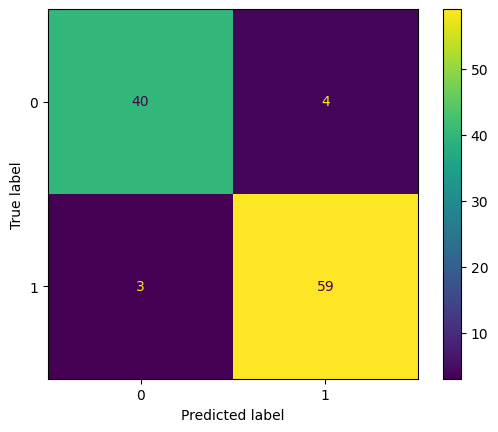

In [14]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred) # Computes the confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred)
print(cm)  #print The confusion matrix which is a table that describes the performance of a classification model.

cn=df_clas['diagnosis'].unique() # Retrieves the unique classes (diagnosis values) to be used as display labels in the confusion matrix visualization.

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn) #display the confusion matrix visualization

We will use different test sizes to find out which test size provides the best balance between training and testing, resulting in the highest accuracy. The sizes we will use are 0.5 and 0.1

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1) # changing test_size to be 0.5

In [16]:
Tclf= DecisionTreeClassifier() #Gini is the selection measure by The default
Tclf=Tclf.fit(x_train,y_train)
y_pred=Tclf.predict(x_test)

In [17]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.903954802259887


[[ 60  12]
 [  5 100]]


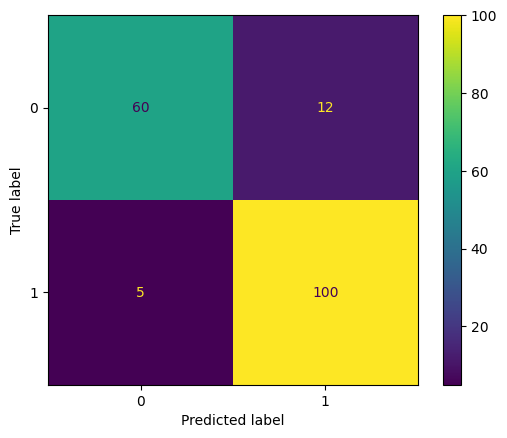

In [18]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df_clas['diagnosis'].unique()

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)  # changing test_size to be 0.1

In [20]:
Tclf= DecisionTreeClassifier() #Gini is the selection measure by The default
Tclf=Tclf.fit(x_train,y_train)
y_pred=Tclf.predict(x_test)

In [21]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8611111111111112


we can observe:
* The highest accuracy is achieved when the test size is 30%, with an accuracy of approximately 0.934.* 
When the test size increases to 50%, the accuracy slightly decreases to around 0.90
* .
With a test size of 10%, the accuracy further decreases to approximately 0.889.

a larger test size means less data available for training, which might lead to decreased model performance due to the model having less data to learn from. However, it's also possible for a smaller test size to cause overfitting, where the model performs well on the test set but poorly on unseen dat

Therefore, it is important to balance training sizes and test sets to ensure that the model generalizes well to unseen data while still training on a sufficient amount of data. In this case, a test size of 30% seems to provide the best balance between training and testing, resulting in the highest accuracy.a.

[[11  3]
 [ 2 20]]


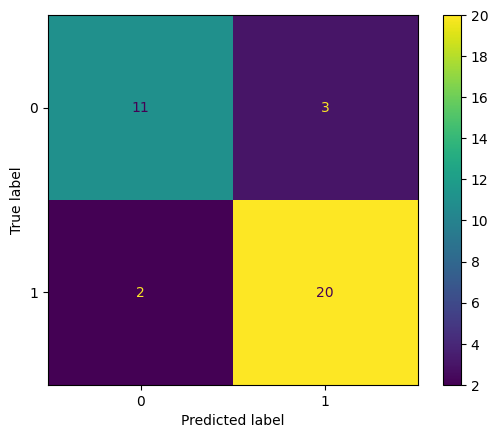

In [22]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df_clas['diagnosis'].unique()

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn)

 initialization a plot, converts class names to strings, and then visualizes the decision tree . The resulting plot shows the structure of the decision tree with node colors representing the class distributions.

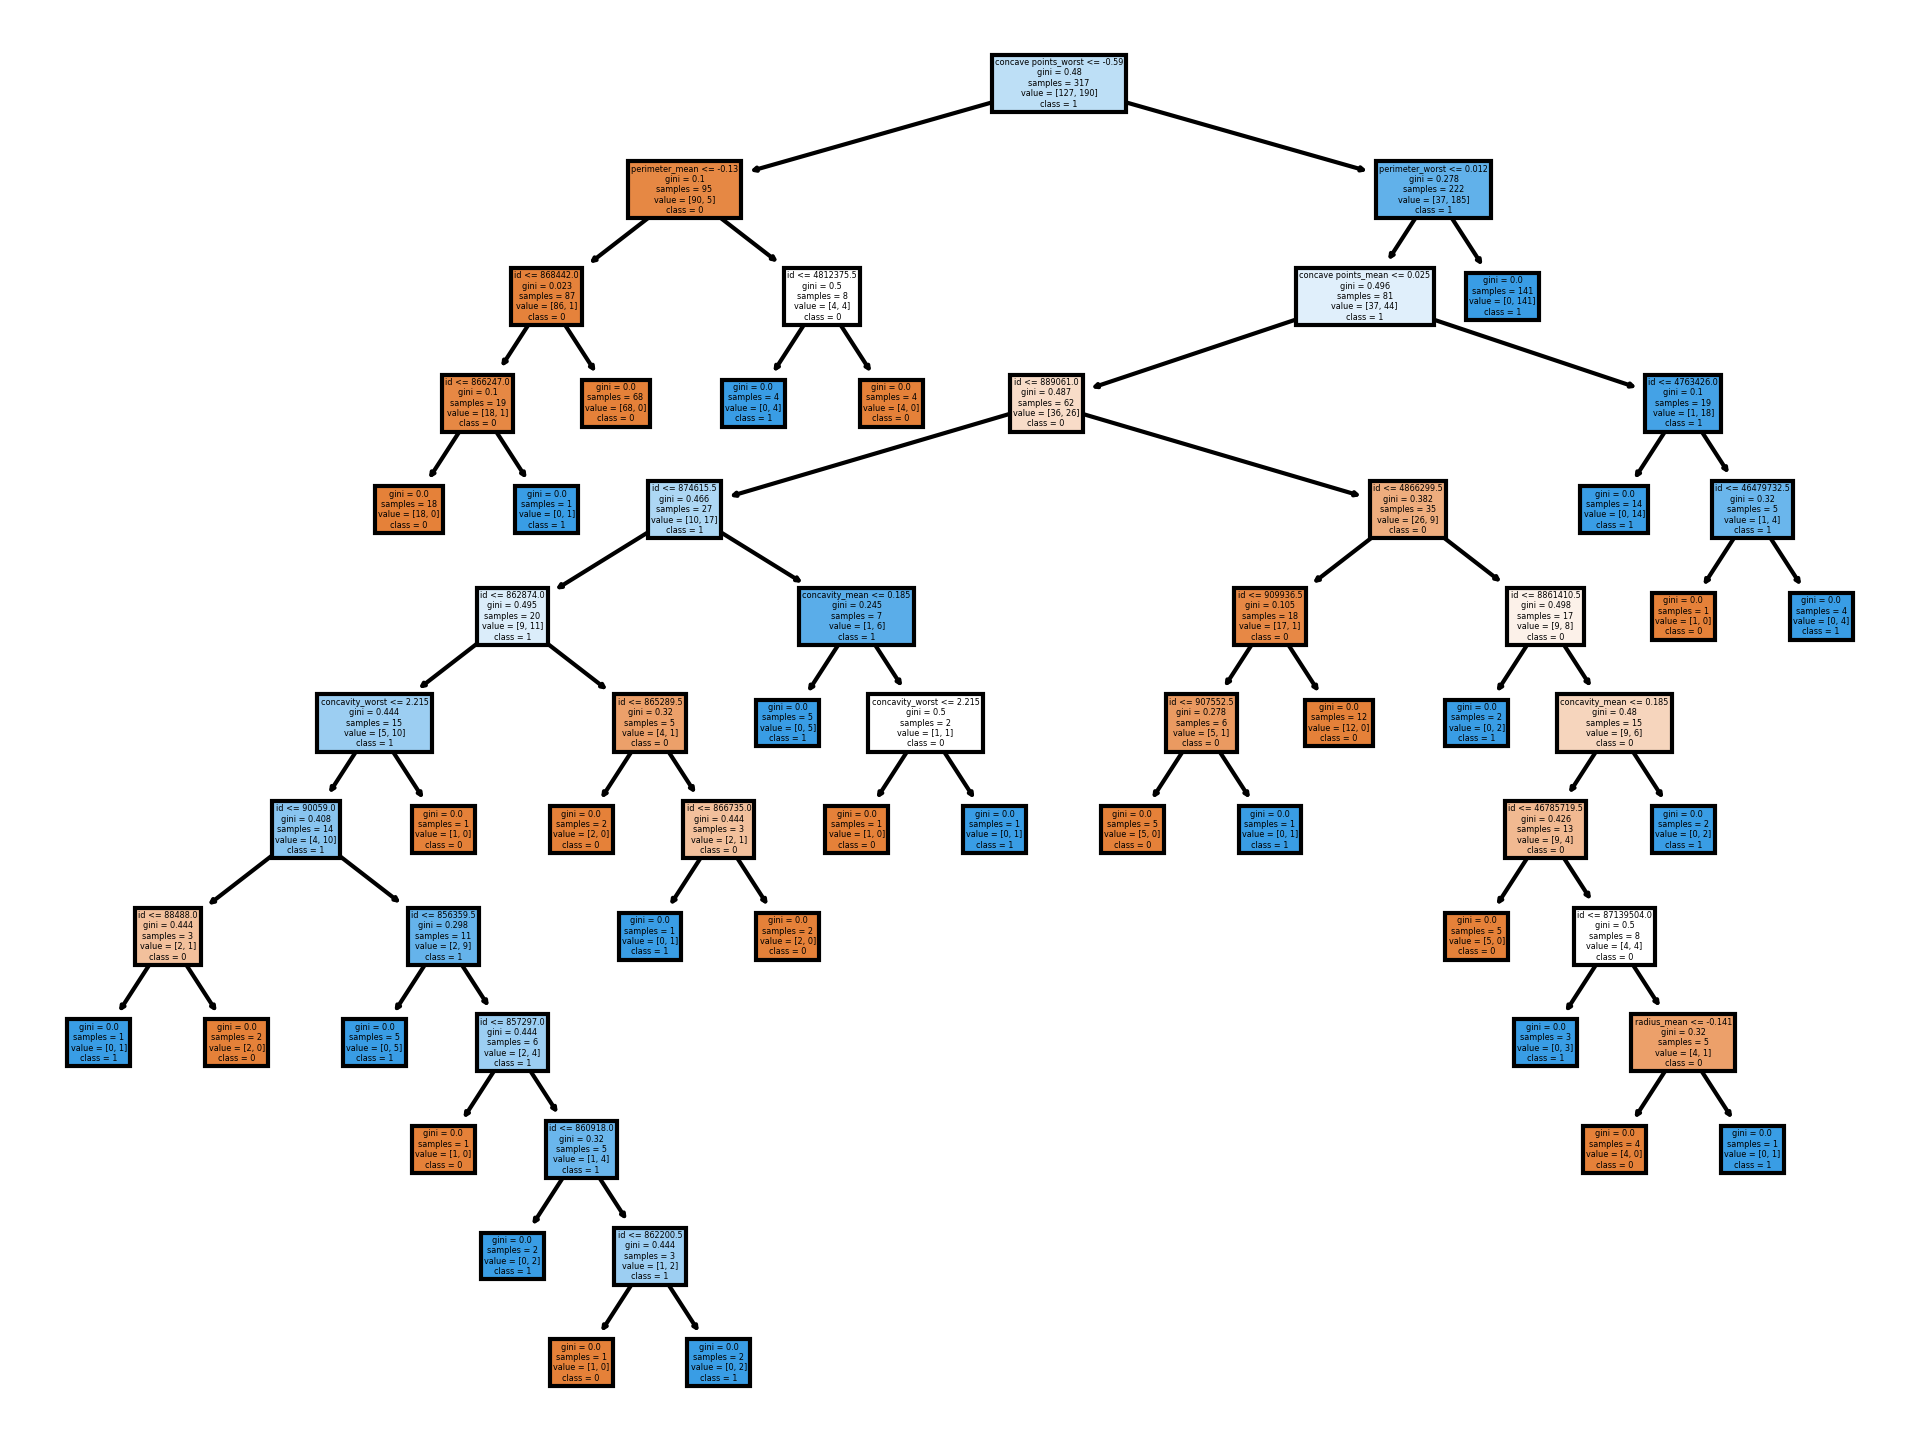

In [23]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,6),dpi=300)

cn = [str(diagnosis) for diagnosis in cn] #converts the class names (diagnosis) to strings
tree.plot_tree(Tclf,feature_names=fn,class_names=cn,filled=True);
#plots the decision tree stored in Tclf
#Tclf: Represents the trained decision tree classifier that you want to visualize.
#feature_names=fn: Specifies the names of the features (columns) in the dataset.
#class_names=cn: Specifies the names of the classes (target variable) in the dataset.
#filled=True: Indicates that the tree nodes should be filled with colors to represent class distributions."""

Previously we have used Gini as selection measure now will use IG (entropy) as selection measure to see the differences between them .

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [25]:
Tclf= DecisionTreeClassifier(criterion="entropy") #changing the selection measure to IG (entropy)
Tclf=Tclf.fit(x_train,y_train)
y_pred=Tclf.predict(x_test)

In [26]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9433962264150944


[[40  4]
 [ 2 60]]


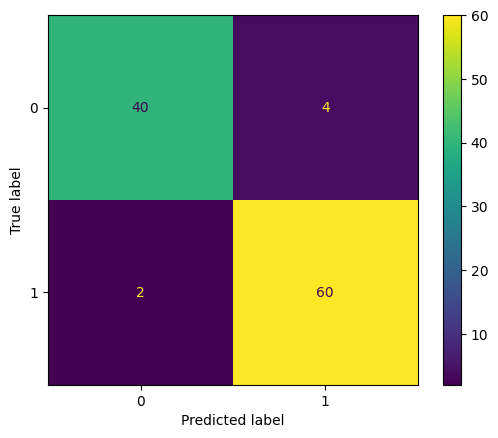

In [27]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df_clas['diagnosis'].unique()

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)

In [29]:
Tclf= DecisionTreeClassifier(criterion="entropy") #changing the selection measure to IG (entropy)
Tclf=Tclf.fit(x_train,y_train)
y_pred=Tclf.predict(x_test)

In [30]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8870056497175142


[[61 11]
 [ 9 96]]


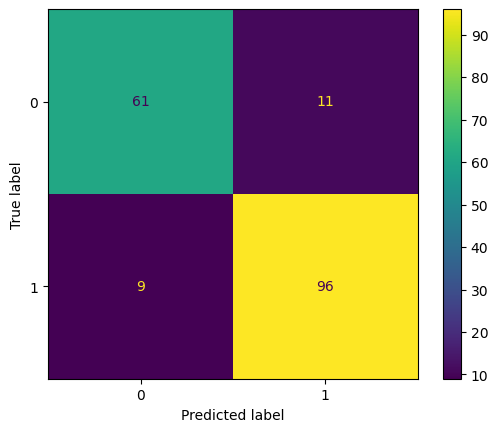

In [31]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df_clas['diagnosis'].unique()

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [33]:
Tclf= DecisionTreeClassifier(criterion="entropy") #changing the selection measure to IG (entropy)
Tclf=Tclf.fit(x_train,y_train)
y_pred=Tclf.predict(x_test)

In [34]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9166666666666666


[[12  2]
 [ 1 21]]


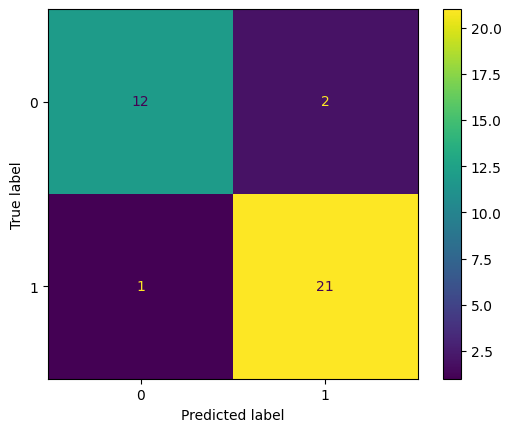

In [35]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df_clas['diagnosis'].unique()

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn)

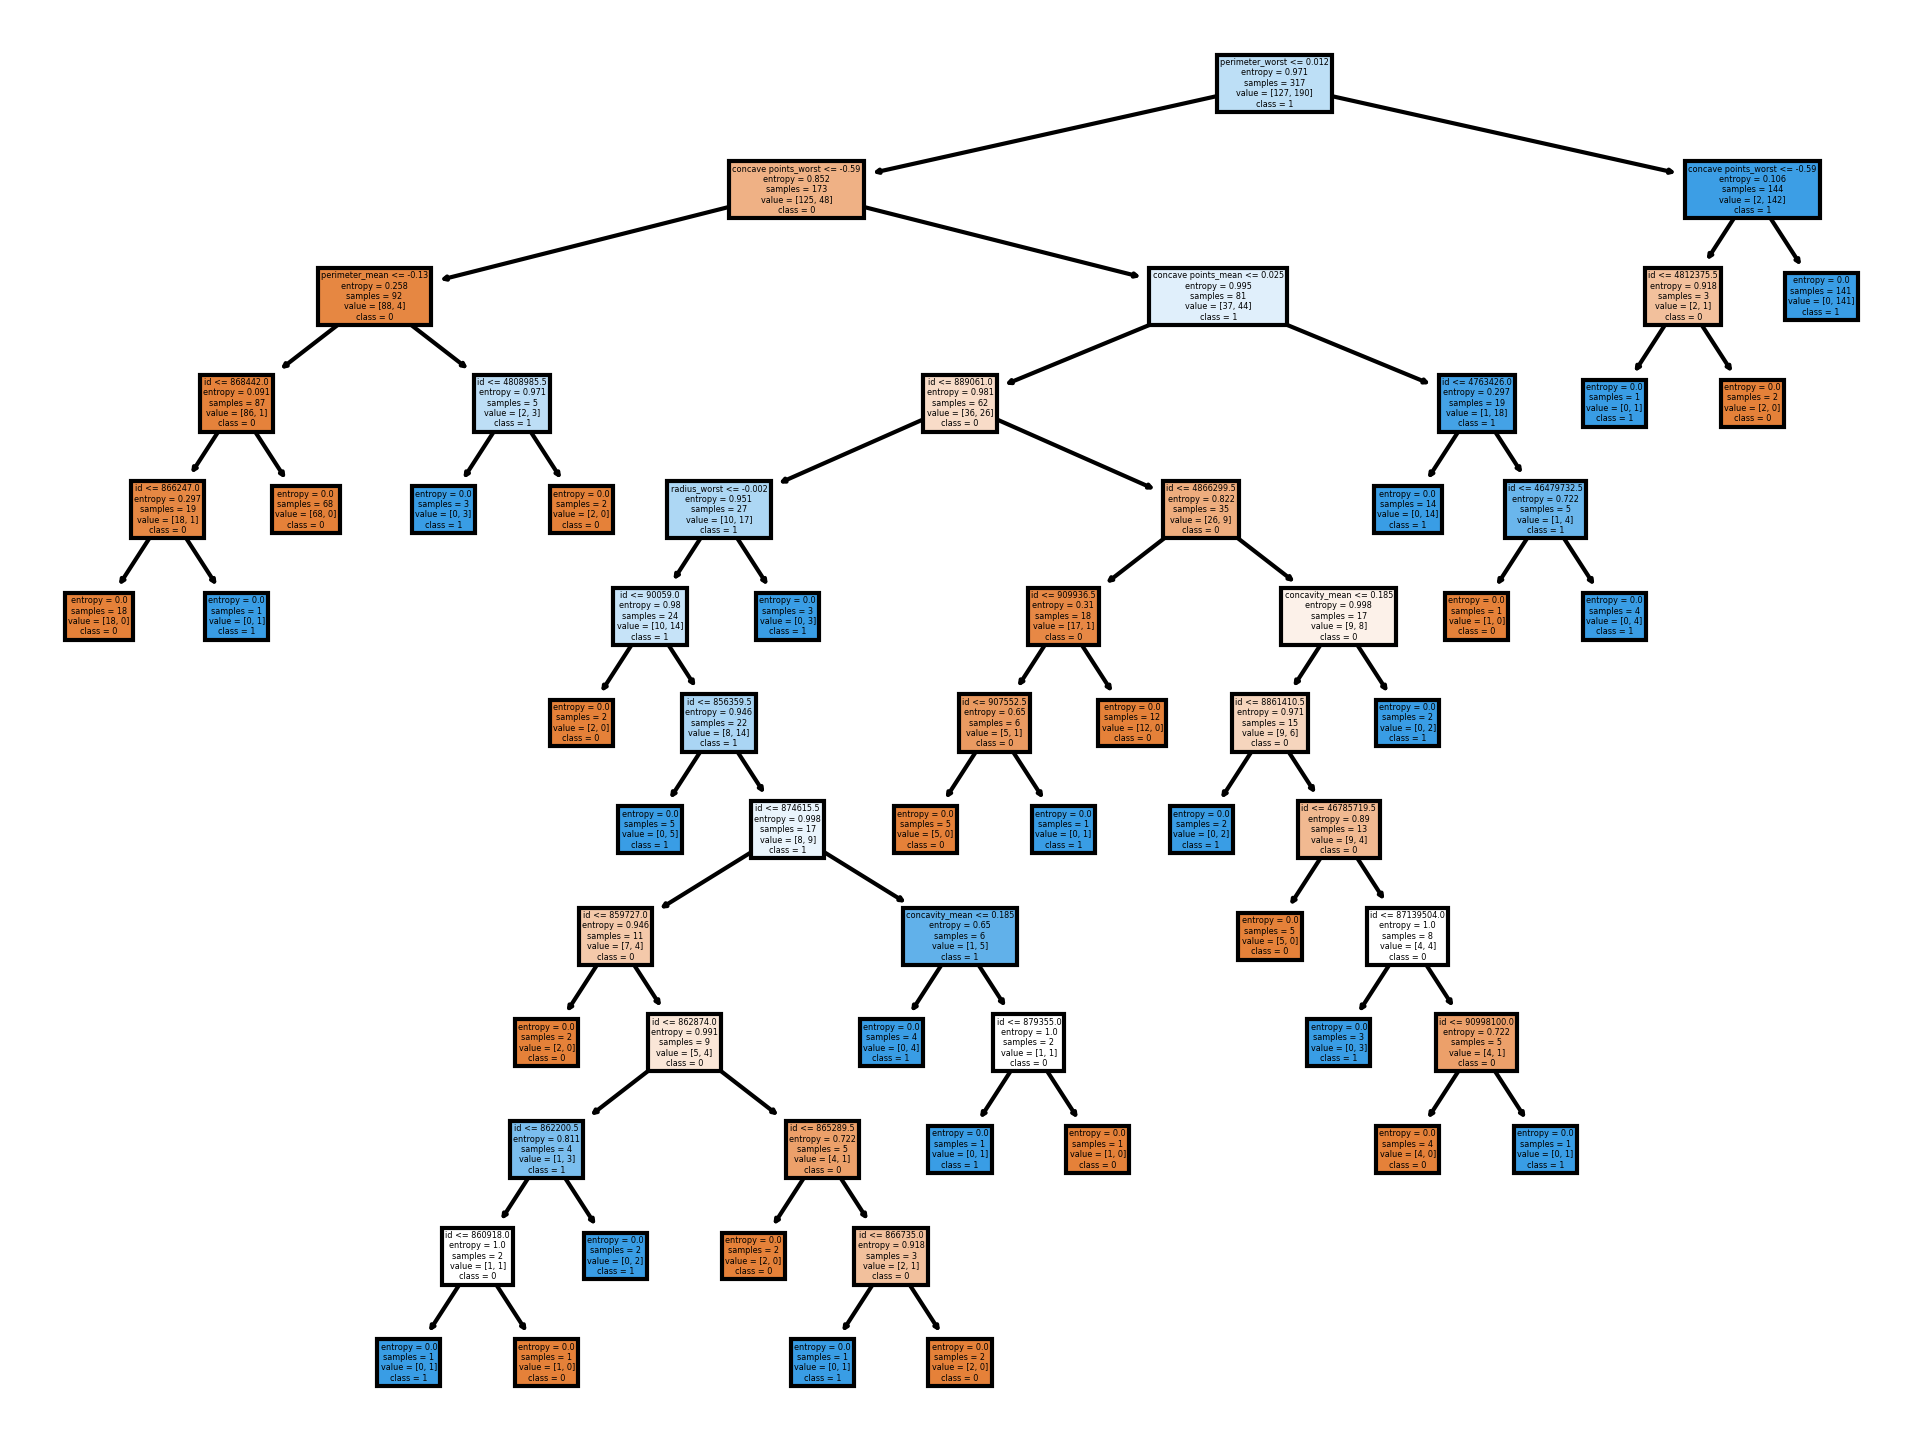

In [36]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,6),dpi=300)

cn = [str(diagnosis) for diagnosis in cn]
tree.plot_tree(Tclf,feature_names=fn,class_names=cn,filled=True);


Using Gini : 

* 
Test Size: 30%, Accuracy: 0.933962264150943* 4
Test Size: 50%, Accuracy: 0.9039548022598* 87
Test Size: 10%, Accuracy: 0.888888888888
  8888
Using Information Gain (Entr
p* y):

Test Size: 30%, Accuracy: 0.9245283018* 867925
Test Size: 50%, Accuracy: 0.881355932* 2033898
Test Size: 10%, Accuracy: 0.9166666666666666

In general, there isn't a significant difference in accuracy between using Gini impurity and Information Gain as the selection measures. but in this case  if we prioritize accuracy alone, Gini impurity appears to perform slightly better across different test sizes. However, the differences in accuracy between the two selection measures are relatively small.

if we prioritize the structures of decision trees Gini might have a slightly deeper structure with 14 nodes compared to the tree with Information Gain  with 13 nodes ,so Information Gain  might be considered better in terms of structure.

it's important to note that the choice between Gini impurity and Information Gain often depends on the specific dataset and problem at hand. Both measures aim to achieve similar outcomes in terms of creating effective splits in decision trees, but they may lead to slightly different tree structures and model performances in practice. Therefore, it's recommended to experiment with both measures and choose the one that performs better on the given dataset.